In [81]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.datasets import mnist
from keras.models import Model
import keras

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_img = Input(shape=(32, 32, 3))

# x_train = x_train[:, :, :, None]
# x_test = x_test[:, :, :, None]
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

z = Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 )(input_img)
z = Conv2D(32, (3, 3), activation='relu')(z)
z = MaxPooling2D()(z)
z = Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 )(z)
features = Conv2D(64, (3, 3), activation='relu')(z)
z = GlobalAveragePooling2D()(features)
z = Dense(10, activation='softmax')(z)

model = Model(input_img, z)
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model_cam = Model(input_img, features)

model.summary()
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
global_average_pooling2d_10  (None, 64)                0         
__________

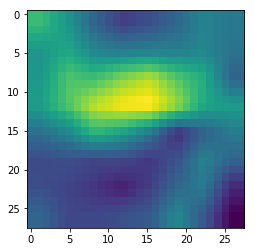

(28, 28)
(64, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(1, 8, 8, 64)


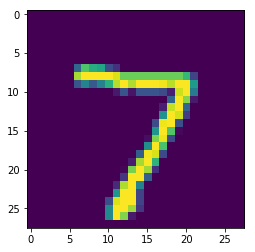

In [75]:
import numpy as np
import skimage
import cv2
single_image = model_cam.predict(x_test[:1, :, :, :])
cam_weights = model.layers[-1].get_weights()[0]
cam_weights_per_class = cam_weights[:, 7]
cam = np.dot(single_image, cam_weights_per_class)
cam /= np.max(cam)
# cam = skimage.transform.resize(cam, (1, 28, 28))
cam = cv2.resize(cam[0], (28, 28), interpolation=cv2.INTER_LINEAR)
plt.imshow(cam)
plt.show()
print(cam.shape)
print(cam_weights.shape)
print(y_test[0])
print(single_image.shape)
import matplotlib.pyplot as plt
plt.imshow(x_test[0, :, :, 0])
plt.show()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.datasets import mnist
from keras.models import Model
import keras

(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_img = Input(shape=(28, 28, 1))

x_train = x_train[:, :, :, None]
x_test = x_test[:, :, :, None]
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

z = Conv2D(32, kernel_size=(3, 3),
                 activation='linear',
                 )(input_img)
features = Conv2D(64, (3, 3), activation='linear')(z)
z = GlobalAveragePooling2D()(features)
z = Dense(10, activation='softmax')(z)

model = Model(input_img, z)
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model_cam = Model(input_img, features)

model.summary()
model.fit(x_train, y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])